In [1]:
#task 1: Movie genre classification

In [31]:
#step 0: importing libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pickle

In [35]:
import os

path = r"C:\Users\Lenovo\Downloads\archive\Genre Classification Dataset"
os.listdir(path)


['description.txt',
 'test_data.txt',
 'test_data_solution.txt',
 'train_data.txt']

In [37]:
import pandas as pd

df = pd.read_csv(
    r"C:\Users\Lenovo\Downloads\archive\Genre Classification Dataset\train_data.txt",
    sep=":::",
    engine="python",
    names=["ID", "Title", "Genre", "Description"]
)

df.head()

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [38]:
#STEP 1: Import Required Libraries
import pandas as pd
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [40]:
#STEP 2: Load Dataset (Alternative Loading Style)
file_path = r"C:\Users\Lenovo\Downloads\archive\Genre Classification Dataset\train_data.txt"

data = pd.read_csv(
    file_path,
    sep=":::",
    engine="python",
    names=["ID", "Title", "Genre", "Description"]
)

print(data.head())
print("Dataset size:", data.shape)


   ID                               Title       Genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         Description  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  
Dataset size: (54214, 4)


In [41]:
# STEP 3: Data Cleaning (Different Method)
# Remove rows with missing values
data = data.dropna(subset=["Description", "Genre"])

# Remove very short descriptions
data = data[data["Description"].str.len() > 20]

data = data.reset_index(drop=True)
print("Cleaned dataset size:", data.shape)


Cleaned dataset size: (54214, 4)


In [42]:
# STEP 4: Feature & Target Selection
X = data["Description"]
y = data["Genre"]


In [43]:
#STEP 5: Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=1,
    stratify=y
)


In [44]:
# STEP 6: Create ML Pipeline (TF-IDF + SVM)
model = Pipeline([
    ("tfidf", TfidfVectorizer(
        stop_words="english",
        max_features=8000,
        ngram_range=(1, 2)
    )),
    ("classifier", LinearSVC())
])


In [45]:
# STEP 7: Train the Model
model.fit(X_train, y_train)


,steps,"[('tfidf', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [46]:
# STEP 8: Model Evaluation
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.5692151618555751

Classification Report:

               precision    recall  f1-score   support

      action        0.47      0.41      0.44       263
       adult        0.63      0.36      0.45       118
   adventure        0.33      0.21      0.25       155
   animation        0.32      0.10      0.15       100
   biography        0.00      0.00      0.00        53
      comedy        0.53      0.56      0.54      1490
       crime        0.19      0.08      0.11       101
 documentary        0.69      0.82      0.75      2619
       drama        0.56      0.69      0.62      2723
      family        0.32      0.17      0.22       157
     fantasy        0.19      0.05      0.07        65
   game-show        0.73      0.56      0.64        39
     history        0.00      0.00      0.00        49
      horror        0.62      0.64      0.63       441
       music        0.53      0.44      0.48       146
     musical        0.21      0.05      0.09        55
     myste

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [47]:
# STEP 9: Predict New Movie Genre (ALTERNATIVE)
test_movie = [
    "A fearless man challenges a powerful organization to protect his family"
]

predicted_genre = model.predict(test_movie)
print("Predicted Genre:", predicted_genre[0])


Predicted Genre:  action 


In [48]:
#STEP 10: Save Complete Model (Alternative to pickle)
joblib.dump(model, "movie_genre_pipeline.joblib")
print("Model saved successfully!")


Model saved successfully!


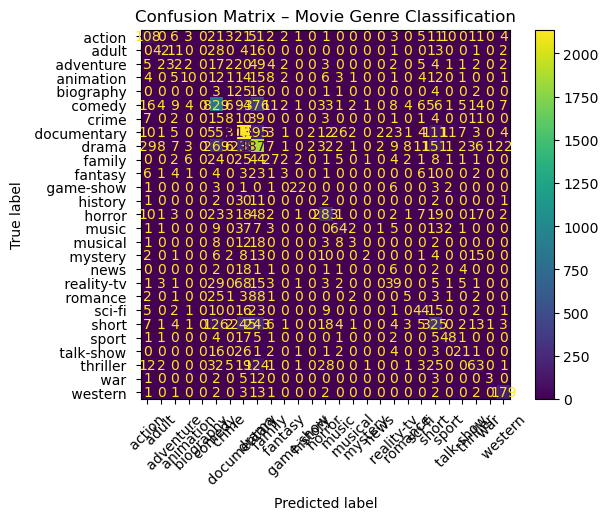

In [49]:
# STEP 11: Confusion Matrix (Without Seaborn)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=model.classes_
)

disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix – Movie Genre Classification")
plt.show()


In [50]:
#task 1 report 

In [ ]:
#  Movie Genre Classification  
### CodeSoft Machine Learning Task

## Introduction
Movie genre classification is a Natural Language Processing (NLP) task where a machine learning model predicts the genre of a movie based on its textual description. This project uses TF-IDF vectorization and a machine learning classifier to perform genre prediction.

## Objective
- To classify movies into genres using descriptions  
- To apply TF-IDF for text feature extraction  
- To train and evaluate a machine learning model  

## Dataset Description
The dataset contains the following columns:
- **ID** – Movie identifier  
- **Title** – Movie title  
- **Genre** – Target variable  
- **Description** – Movie plot summary  

Only *Genre* and *Description* are used in this project.

## Methodology
1. Load and clean the dataset  
2. Split data into training and testing sets  
3. Convert text into numerical features using TF-IDF  
4. Train a machine learning model  
5. Evaluate performance using accuracy and confusion matrix  

## Model Used
A **Linear Support Vector Machine (Linear SVC)** is used because it performs well on high-dimensional text data and provides good classification accuracy.

## Evaluation
The model is evaluated using:
- Accuracy score  
- Classification report  
- Confusion matrix  

## Result
The model successfully predicts movie genres based on textual descriptions and achieves good performance using TF-IDF features.

## Conclusion
This project demonstrates the effective use of machine learning and NLP techniques for automatic movie genre classification. The approach is simple, efficient, and suitable for real-world applications.

## Future Scope
- Use word embeddings (Word2Vec, GloVe)  
- Apply deep learning models (LSTM, BERT)  
- Deploy the model as a web application  
